# 第9章 绘图和可视化

## 9.1 matplotlib API入门

In [2]:
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import pandas as pd

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

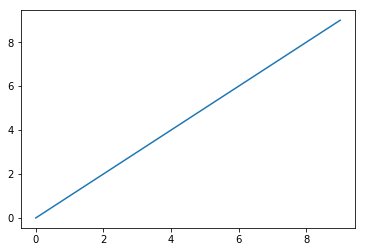

In [6]:
plt.plot(data)

### Figure和Subplot

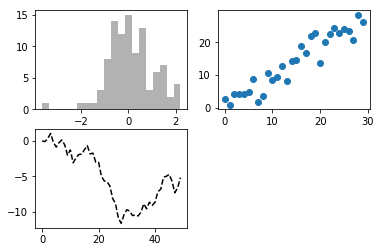

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192746D5AC8>,
      dtype=object)

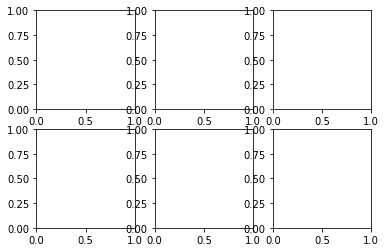

In [51]:
fig, axes = plt.subplots(2, 3)
axes

### 调整subplot周围的间距

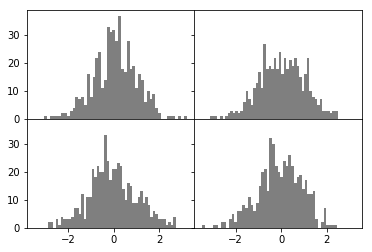

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins= 50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型

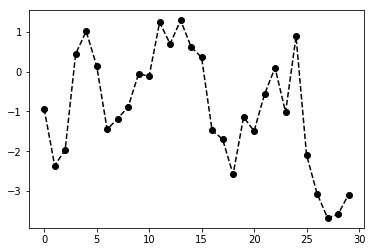

In [59]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')
#plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

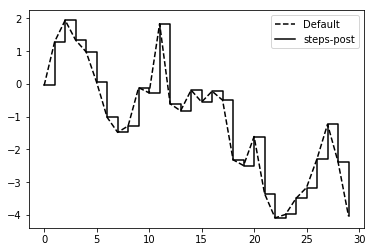

In [71]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 刻度、标签和图例

### 设置标题、轴标签、刻度以及刻度标签

Text(0.5, 0, 'Stages')

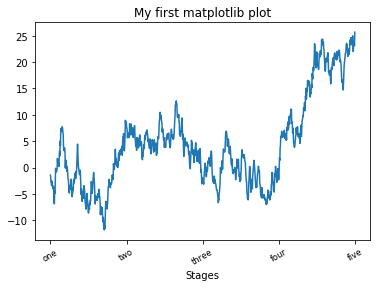

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 添加图例

In [83]:
from numpy.random import randn

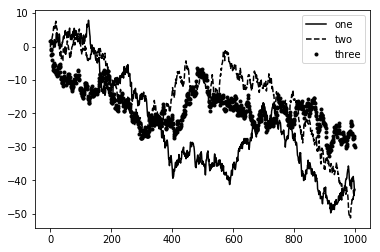

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 注解以及在Subplot上绘图

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

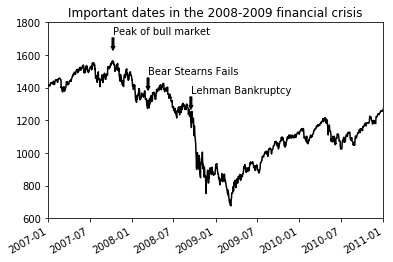

In [128]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('./examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

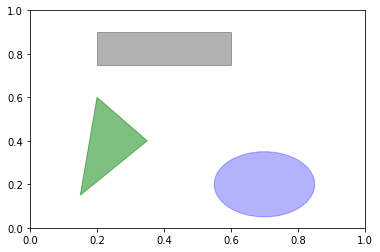

In [99]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件

In [100]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### matplotlib配置

## 9.2 使用pandas和seaborn绘图

### 线型图

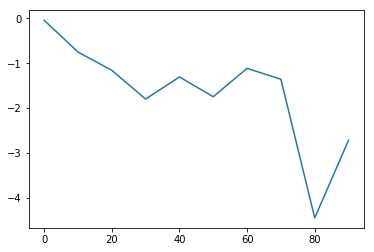

In [102]:
s = pd.Series(np.random.randn(10).cumsum(),
             index=np.arange(0, 100, 10))
s.plot()

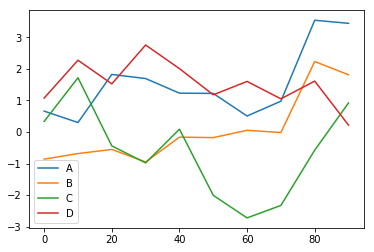

In [104]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

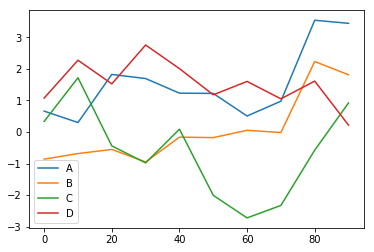

In [105]:
df.plot.line()

### 柱状图

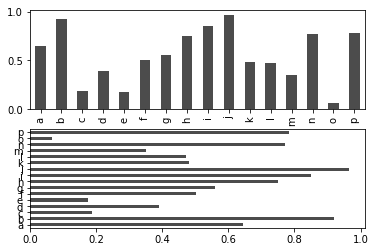

In [109]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16),
                index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [110]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [111]:
df

Genus,A,B,C,D
one,0.364780,0.984380,0.237761,0.741088
two,0.618427,0.563696,0.370088,0.992946
three,0.303283,0.829109,0.004653,0.189870
four,0.235315,0.975004,0.653071,0.798175
five,0.794279,0.908767,0.095753,0.189480
six,0.760047,0.979946,0.906142,0.534564


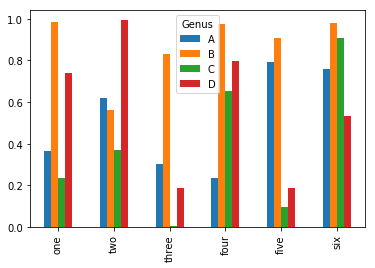

In [113]:
df.plot.bar()

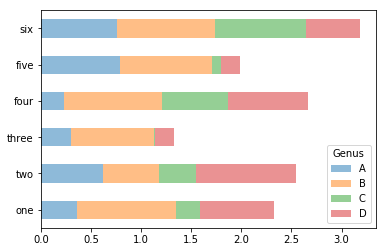

In [114]:
df.plot.barh(stacked=True, alpha=0.5)

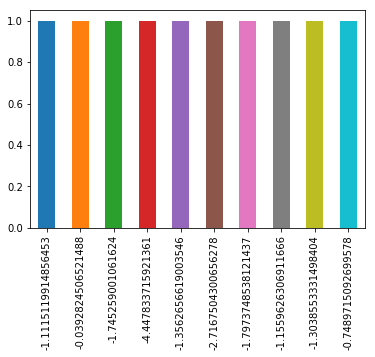

In [116]:
s.value_counts().plot.bar()

In [129]:
tips = pd.read_csv('./examples/tips.csv')

In [125]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [149]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [150]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [151]:
party_counts = party_counts.loc[:, 2:5]

In [152]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


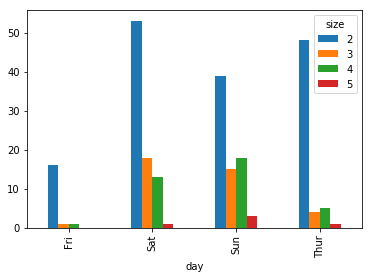

In [153]:
party_counts.plot.bar()

In [154]:
import seaborn as sns

In [155]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [156]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


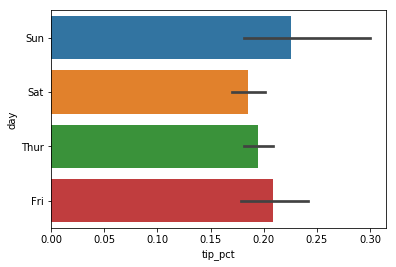

In [158]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

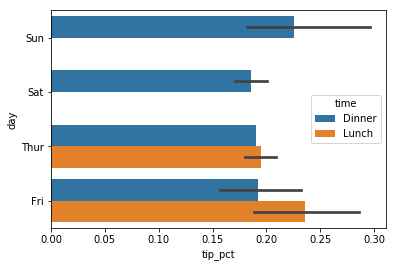

In [159]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [160]:
sns.set(style='whitegrid')

### 直方图和密度图

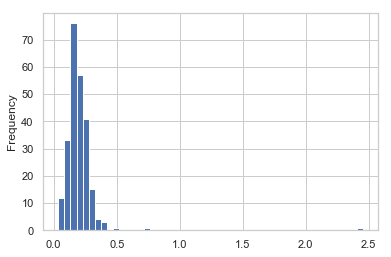

In [161]:
tips['tip_pct'].plot.hist(bins=50)

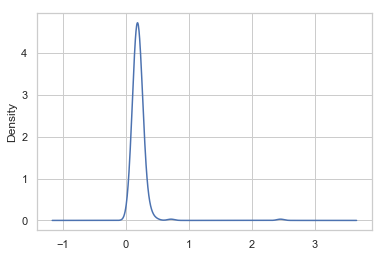

In [162]:
tips['tip_pct'].plot.density()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


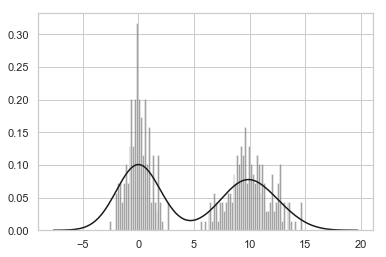

In [165]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散布图或点图

In [168]:
macro = pd.read_csv('./examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versusu log unemp')

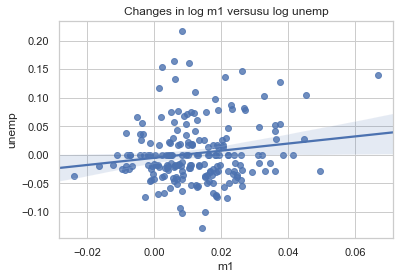

In [172]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versusu log %s' % ('m1', 'unemp'))

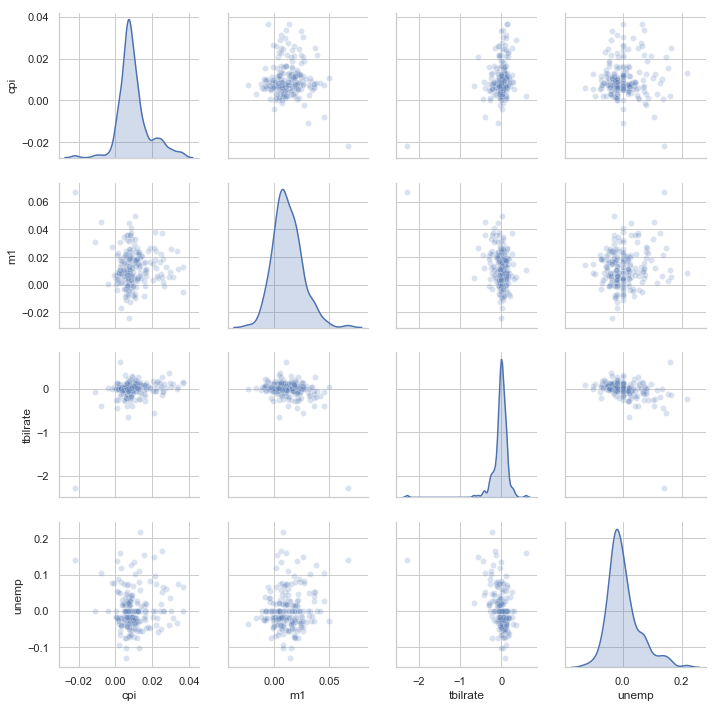

In [173]:
sns.pairplot(trans_data, diag_kind='kde',
            plot_kws={'alpha':0.2})

### 分面网格（facet grid )和类型数据

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


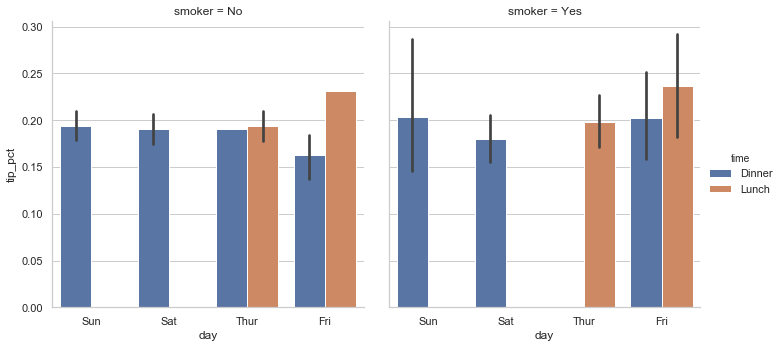

In [175]:
sns.factorplot(x='day', y='tip_pct', hue='time',
               col='smoker', kind='bar',
               data=tips[tips.tip_pct < 1])

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


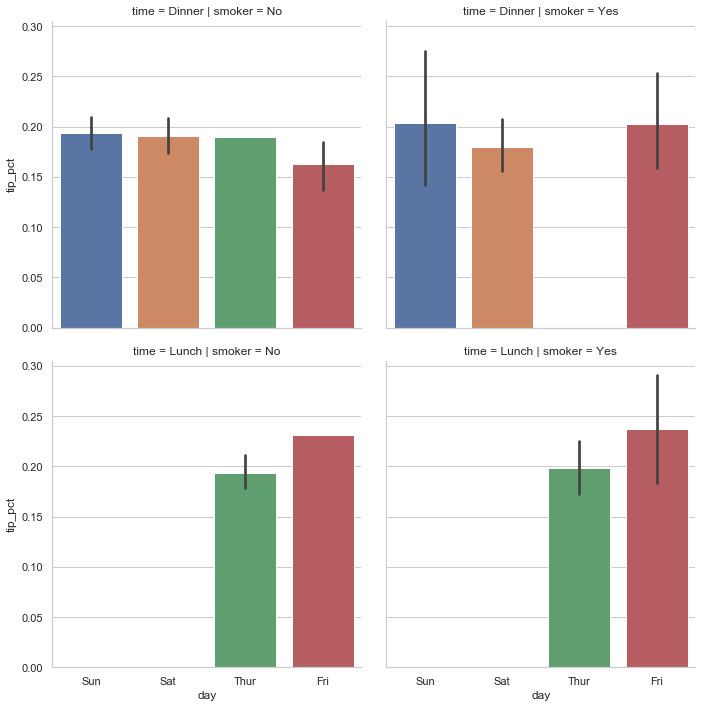

In [176]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker', kind='bar',
               data=tips[tips.tip_pct < 1])

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


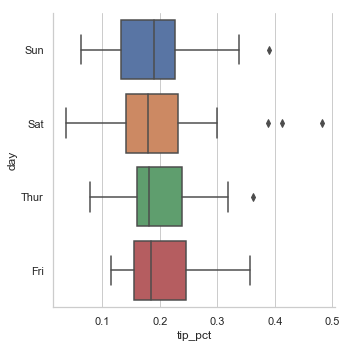

In [177]:
sns.factorplot(x='tip_pct',y='day',kind='box',
               data=tips[tips.tip_pct < 0.5])

## 9.3 其他的Python可视化工具

这一块可以搜索最新的资源来不断的提升效率。

# 继续加油，可以多在科赛上练习了！